# Pandas

**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)

### 1) Đọc, quan sát và chuẩn hóa dữ liệu
Đọc file dữ liệu "Data_Bicycle_Counter.csv" và thực hiện các yêu cầu sau:

1.1 Kiểm tra dữ liệu missing

1.2 Liệt kê các thời điểm không có dữ liệu (Missing values)

1.3 Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian

1.4 Thiết lập cột Date làm index cho DataFrame ()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Đọc dữ liệu
df_bicycle= pd.read_csv('Data_Bicycle_Counter.csv')
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          135614 non-null  object 
 1   Fremont Bridge Total          135593 non-null  float64
 2   Fremont Bridge East Sidewalk  135593 non-null  float64
 3   Fremont Bridge West Sidewalk  135593 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [3]:
# kiểm tra dữ liệu missing bằng isnull() và sum()
missing_data = df_bicycle.isnull().sum()
print(missing_data)

Date                             0
Fremont Bridge Total            21
Fremont Bridge East Sidewalk    21
Fremont Bridge West Sidewalk    21
dtype: int64


In [4]:
# Liệt kê các thời điểm không có dữ liệu (Missing values)
df_bicycle[df_bicycle.isnull().any(axis=1)]


,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
6105,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6106,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12530,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21266,03/08/2015 02:00:00 AM,NaN,NaN,NaN
22331,04/21/2015 11:00:00 AM,NaN,NaN,NaN
22332,04/21/2015 12:00:00 PM,NaN,NaN,NaN
30170,03/13/2016 02:00:00 AM,NaN,NaN,NaN
38906,03/12/2017 02:00:00 AM,NaN,NaN,NaN
47642,03/11/2018 02:00:00 AM,NaN,NaN,NaN
56378,03/10/2019 02:00:00 AM,NaN,NaN,NaN


In [5]:
# đổi thành tên ngắn gọn
df_bicycle.columns = ['Date','Total', 'East', 'West']
df_bicycle

,Date,Total,East,West
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
135609,08/31/2020 07:00:00 PM,190.0,79.0,111.0
135610,08/31/2020 08:00:00 PM,108.0,58.0,50.0
135611,08/31/2020 09:00:00 PM,33.0,11.0,22.0
135612,08/31/2020 10:00:00 PM,36.0,14.0,22.0


In [6]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian bằng hàm to_datetime()
df_bicycle['Date'] = pd.to_datetime(df_bicycle['Date'])
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    135614 non-null  datetime64[ns]
 1   Total   135593 non-null  float64       
 2   East    135593 non-null  float64       
 3   West    135593 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.1 MB


In [7]:
#Thiết lập cột Date làm index cho DataFrame bằng hàm set_index
df_bicycle = df_bicycle.set_index('Date')
print(df_bicycle.head())

                     Total  East  West
Date                                  
2012-10-03 00:00:00   13.0   4.0   9.0
2012-10-03 01:00:00   10.0   4.0   6.0
2012-10-03 02:00:00    2.0   1.0   1.0
2012-10-03 03:00:00    5.0   2.0   3.0
2012-10-03 04:00:00    7.0   6.0   1.0


### 2) Khám phá tập dữ liệu
Sử dụng các đặc trưng thống kê

In [38]:
#Sử dụng sum tính tổng lượt người đi xe đạp
total_by_hour = df_bicycle['Total'].resample('H').sum()
print(total_by_hour)

total_bicycle_count = df_bicycle['Total'].sum()
print("Tổng lượt người đi xe đạp qua cầu là:", total_bicycle_count)


Date
2012-10-03 00:00:00     26.0
2012-10-03 01:00:00     20.0
2012-10-03 02:00:00      4.0
2012-10-03 03:00:00     10.0
2012-10-03 04:00:00     14.0
                       ...  
2020-08-31 19:00:00    190.0
2020-08-31 20:00:00    108.0
2020-08-31 21:00:00     33.0
2020-08-31 22:00:00     36.0
2020-08-31 23:00:00      8.0
Freq: H, Name: Total, Length: 69360, dtype: float64
Tổng lượt người đi xe đạp qua cầu là: 15341827.0


Tổng số lượng xe đạp qua cầu phía West:  8344494.0


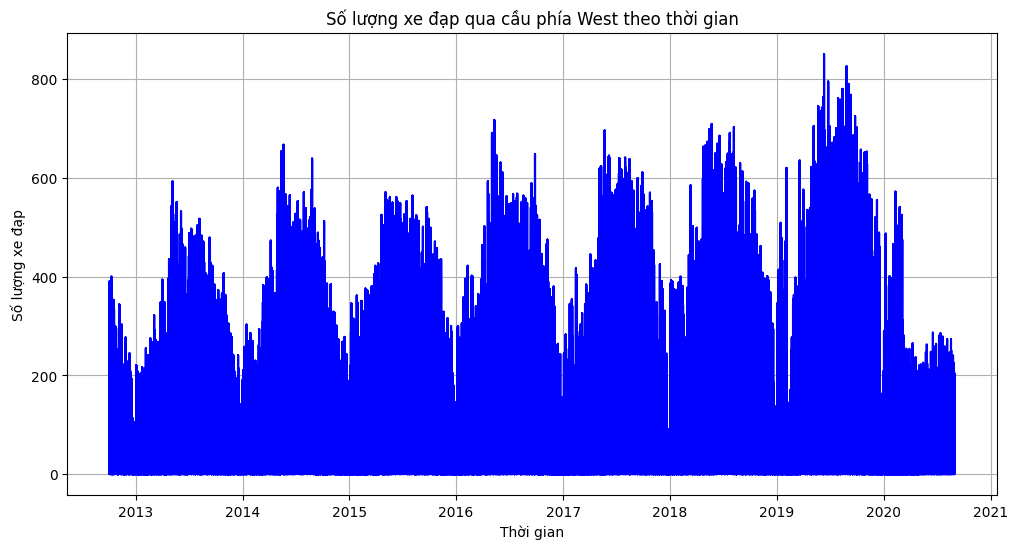

In [9]:
#Thống kê số lượng xe đạp qua cầu phía West
total_west = df_bicycle['West'].sum()
print("Tổng số lượng xe đạp qua cầu phía West: ", total_west)

#Trực quan hóa số liệu thống kê (lựa chọn biểu đồ thích hợp để trực quan hóa dữ liệu trên)
plt.figure(figsize=(12, 6))  # Kích thước biểu đồ
plt.plot(df_bicycle.index, df_bicycle['West'], label='Số lượng xe đạp phía West', color='blue')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng xe đạp')
plt.title('Số lượng xe đạp qua cầu phía West theo thời gian')
plt.grid(True)


Tổng số lượng xe đạp qua cầu phía West:  6997333.0


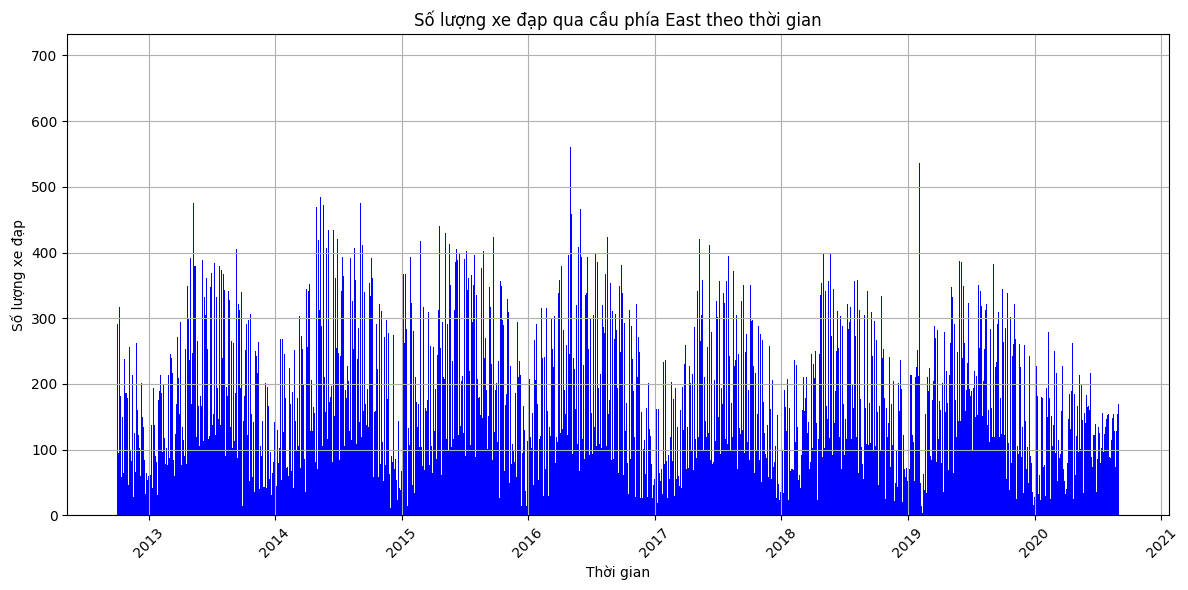

In [10]:
#Thống kê số lượng xe đạp qua cầu phía East
total_aest = df_bicycle['East'].sum()
print("Tổng số lượng xe đạp qua cầu phía West: ", total_aest)

#Trực quan hóa số liệu thống kê (lựa chọn biểu đồ thích hợp để trực quan hóa dữ liệu trên)
plt.figure(figsize=(12, 6))
plt.bar(df_bicycle.index, df_bicycle['East'], width=0.7, color='blue', label='Số lượng xe đạp phía West')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng xe đạp')
plt.title('Số lượng xe đạp qua cầu phía East theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét: Số lượng xe đạp đi qua cầu phía West cao hơn phía East
-
-
-

### 3) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung và rút ra kết luận (tối thiểu 2 kết luận)

In [11]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019
df_full_year = df_bicycle.loc['2013':'2019']
df_full_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122688 entries, 2013-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   122668 non-null  float64
 1   East    122668 non-null  float64
 2   West    122668 non-null  float64
dtypes: float64(3)
memory usage: 3.7 MB


In [13]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
#Tính tổng số lượt qua cầu theo năm
yearly = df_full_year.resample('Y').sum()
yearly

,Total,East,West
Date,,,
2013-12-31,1856558.0,957982.0,898576.0
2014-12-31,2012392.0,1030652.0,981740.0
2015-12-31,1973112.0,1001830.0,971282.0
2016-12-31,1964940.0,936608.0,1028332.0
2017-12-31,1926270.0,825010.0,1101260.0
2018-12-31,2103760.0,851310.0,1252450.0
2019-12-31,2374292.0,899708.0,1474584.0


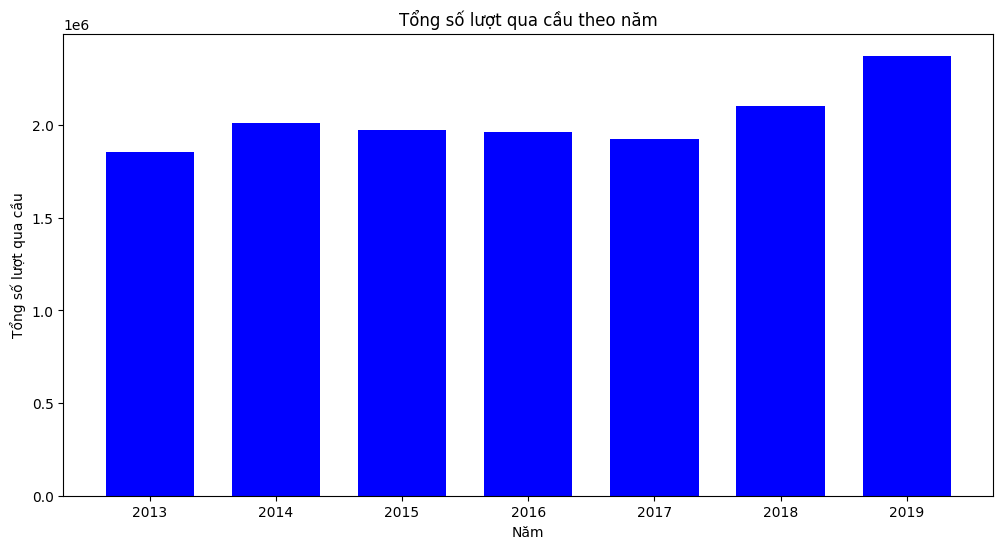

In [15]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.figure(figsize=(12, 6))
plt.bar(yearly.index.year, yearly['Total'], width=0.7, color='blue', label='Tổng số lượt qua cầu theo năm')
plt.xlabel('Năm')
plt.ylabel('Tổng số lượt qua cầu')
plt.title('Tổng số lượt qua cầu theo năm')
plt.show()

Nhận xét:
- Nhìn chung, tổng số lượt qua cầu theo các năm không đồng đều nhau và đều có sự chênh lệnh
- Xu hướng đi xe đạp qua cầu có xu hướng tăng
- 

### 4) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ và rút ra kết luận (tối thiểu 2 kết luận)

In [16]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
data_month = df_full_year.resample('M').sum()
data_month.head()

,Total,East,West
Date,,,
2013-01-31,89768.0,45820.0,43948.0
2013-02-28,100054.0,51796.0,48258.0
2013-03-31,132178.0,68886.0,63292.0
2013-04-30,143996.0,74606.0,69390.0
2013-05-31,217148.0,113674.0,103474.0


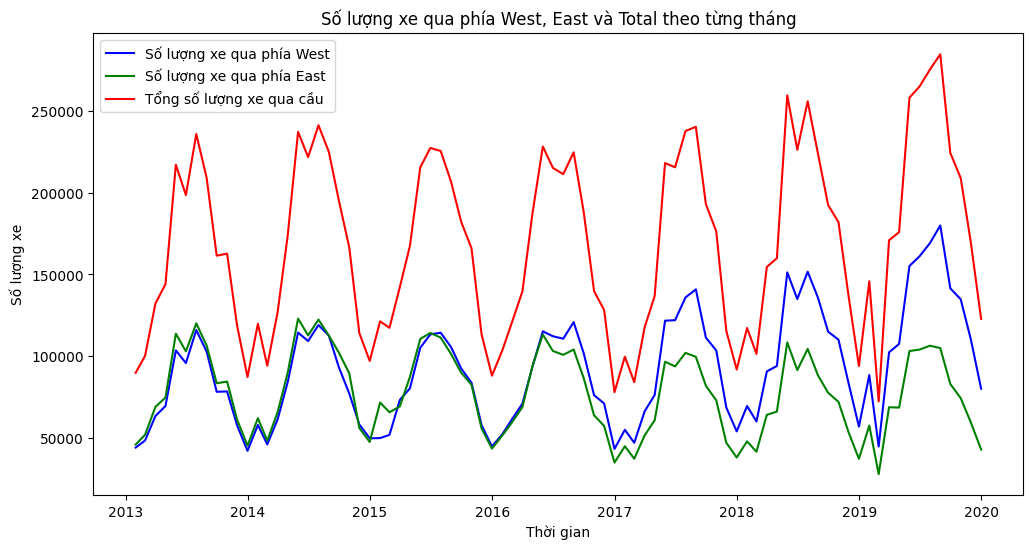

In [20]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.figure(figsize=(12, 6))
plt.plot(data_month.index, data_month['West'], label='Số lượng xe qua phía West', color='blue')
plt.plot(data_month.index, data_month['East'], label='Số lượng xe qua phía East', color='green')
plt.plot(data_month.index, data_month['Total'], label='Tổng số lượng xe qua cầu', color='red')

plt.xlabel('Thời gian')
plt.ylabel('Số lượng xe')

plt.title('Số lượng xe qua phía West, East và Total theo từng tháng')

plt.legend()
plt.show()

                     Total
Date                      
2019-01-01 00:00:00    9.0
2019-01-01 01:00:00   24.0
2019-01-01 02:00:00   12.0
2019-01-01 03:00:00    3.0
2019-01-01 04:00:00    3.0
...                    ...
2019-12-31 19:00:00   19.0
2019-12-31 20:00:00   13.0
2019-12-31 21:00:00   15.0
2019-12-31 22:00:00   15.0
2019-12-31 23:00:00   16.0

[17520 rows x 1 columns]


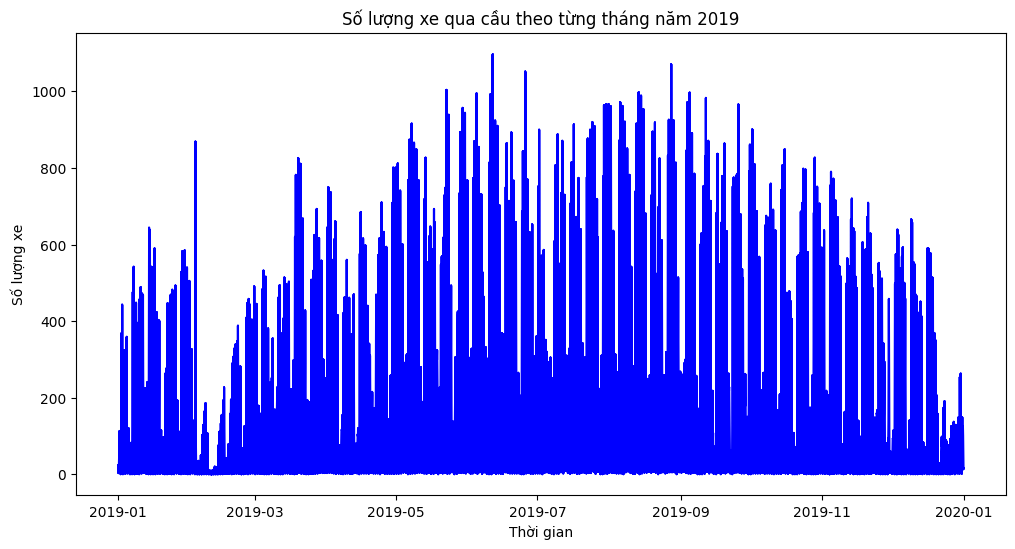

In [23]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].
data_2019 = df_bicycle.loc['2019',['Total']]
print(data_2019)

#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.figure(figsize=(12, 6))
plt.plot(data_2019.index, data_2019['Total'], label='Số lượng xe qua cầu (Total)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Số lượng xe')

plt.title('Số lượng xe qua cầu theo từng tháng năm 2019')

plt.show()

Nhận xét:
- Số lượng xe qua cầu năm 2019 không đồng đều
- Số lượng xe qua cầu tập trung vào tháng 6 đến tháng 9
- Tháng 2 có số lượng xe ít nhất

### 5) Thống kê lượng đi xe đạp theo giờ và rút ra kết luận (tối thiểu 2 kết luận)

In [24]:
#Tính trung bình lượng xe theo từng giờ qua cầu trong toàn bộ tập dữ liệu sử dụng groupby
by_time = by_time = df_bicycle.groupby(df_bicycle.index.time).mean()
by_time

,Total,East,West
00:00:00,11.304902,4.791541,6.513360
01:00:00,5.984074,2.680764,3.303309
02:00:00,3.938453,1.890032,2.048421
03:00:00,2.903557,1.493895,1.409662
04:00:00,6.487878,3.440807,3.047071
05:00:00,25.589630,15.619182,9.970448
06:00:00,89.945496,54.047779,35.897717
07:00:00,227.002831,140.801982,86.200849
08:00:00,322.147231,189.640241,132.506990
09:00:00,188.577093,102.221101,86.355992


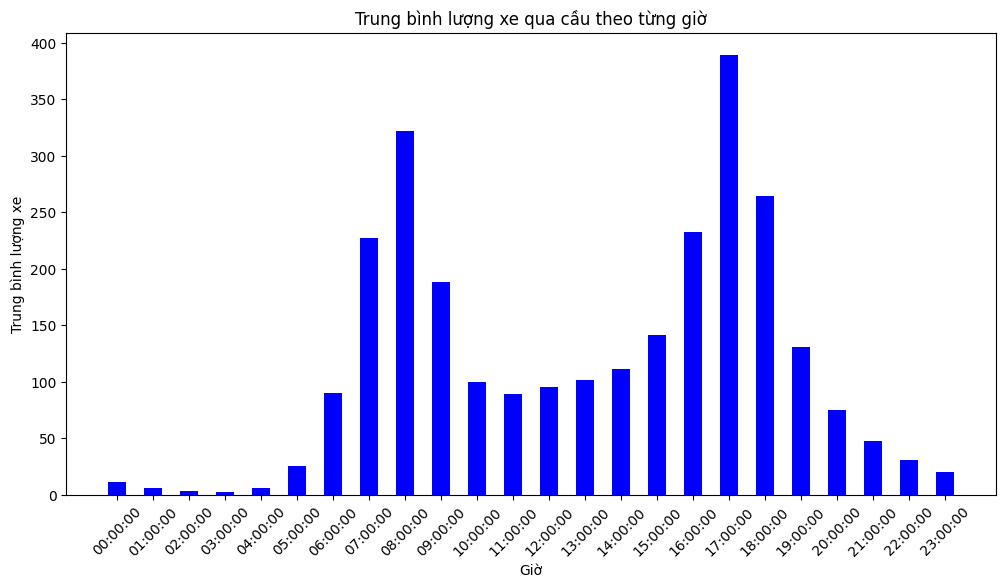

In [30]:
#Trực quan hóa dữ liệu:
plt.figure(figsize=(12, 6))  # Kích thước biểu đồ
plt.bar([str(time) for time in by_time.index], by_time['Total'], width=0.5, color='blue')

plt.xlabel('Giờ')
plt.ylabel('Trung bình lượng xe')

plt.title('Trung bình lượng xe qua cầu theo từng giờ')

plt.xticks(rotation=45)
plt.show()


Nhận xét:
- Trung bình lượng xe qua cầu tập trung vào khung giờ từ 16h - 18h
- Từ 00h - 04h là khung giờ ít xe nhất
-


### 6) Thống kê lượng xe trung bình theo ngày trong tuần và rút ra kết luận (tối thiểu 2 kết luận)

In [31]:
#Nhóm dữ liệu theo ngày trong tuần và tính trung bình sử dụng groupby và mean
df_weekday = df_bicycle.groupby(df_bicycle.index.day_name()).mean()
df_weekday = df_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#Đổi tên index theo ngày dễ quan sát
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday


,Total,East,West
Mon,132.039395,58.638527,73.400867
Tues,140.619442,62.726267,77.893175
Wed,139.598217,62.306091,77.292126
Thurs,132.737108,59.636035,73.101073
Fri,120.132101,53.894702,66.237399
Sat,64.290376,32.242720,32.047656
Sun,62.537484,31.765849,30.771635


In [32]:
#Thực hiện thống kê số lượng người đi xe đạp qua cầu
#Tách giữa ngày làm việc [thứ 2 - thứ 5] và ngày cuối tuần [thứ 7, CN]
df_weekend = np.where(df_bicycle.index.weekday < 5, 'Weekday', 'Weekend')
#Tính lượng người đi qua trung bình theo giờ giữa các ngày trong tuần và cuối tuần
df_by_time = df_bicycle.groupby([df_weekend, df_bicycle.index.time]).mean()
df_by_time

Total        East        West
Weekday 00:00:00    9.457766    4.056725    5.401040
        01:00:00    4.685410    2.105772    2.579638
        02:00:00    3.124102    1.540253    1.583849
        03:00:00    2.684667    1.400297    1.284370
        04:00:00    7.548427    4.185286    3.363141
        05:00:00   32.884815   20.301214   12.583602
        06:00:00  119.124102   72.465940   46.658162
        07:00:00  304.762200  190.401784  114.360416
        08:00:00  426.898935  252.931880  173.967055
        09:00:00  231.165056  125.983147  105.181908
        10:00:00  100.296159   52.005700   48.290458
        11:00:00   76.339281   39.444857   36.894424
        12:00:00   79.305576   39.797274   39.508302
        13:00:00   85.723309   41.936587   43.786723
        14:00:00   97.395937   44.588949   52.806987
        15:00:00  140.262884   58.340436   81.922448
        16:00:00  273.199950   90.102577  183.097374
        17:00:00  500.728444  135.932607  364.795837
        18:00:00  336.802279  108.514866  228.287413
        19:00:00  159.925917   58.199950  101.725966
        20:00:00   88.395937   34.831021   53.564916
        21:00:00   55.300793   23.790882   31.509911
        22:00:00   34.888503   14.838206   20.050297
        23:00:00   21.797324    8.888008   12.909316
Weekend 00:00:00   15.925031    6.629492    9.295539
        01:00:00    9.232342    4.118959    5.113383
        02:00:00    5.991880    2.772017    3.219863
        03:00:00    3.451053    1.728005    1.723048
        04:00:00    3.835192    1.578686    2.256506
        05:00:00    7.342627    3.908302    3.434325
        06:00:00   16.962825    7.979554    8.983271
        07:00:00   32.508055   16.741016   15.767038
        08:00:00   60.138166   31.332714   28.805452
        09:00:00   82.107187   42.815985   39.291202
        10:00:00  100.466543   53.307931   47.158612
        11:00:00  121.429988   62.970880   58.459108
        12:00:00  135.104089   69.325898   65.778191
        13:00:00  142.465923   72.584882   69.881041
        14:00:00  145.470880   74.059480   71.411400
        15:00:00  143.983891   73.043371   70.940520
        16:00:00  132.460347   66.864932   65.595415
        17:00:00  110.272615   55.041512   55.231103
        18:00:00   84.885378   42.539033   42.346344
        19:00:00   57.275093   28.172243   29.102850
        20:00:00   41.561338   19.641264   21.920074
        21:00:00   29.341388   13.668525   15.672862
        22:00:00   21.982652    9.896530   12.086121
        23:00:00   17.284387    7.148079   10.136307

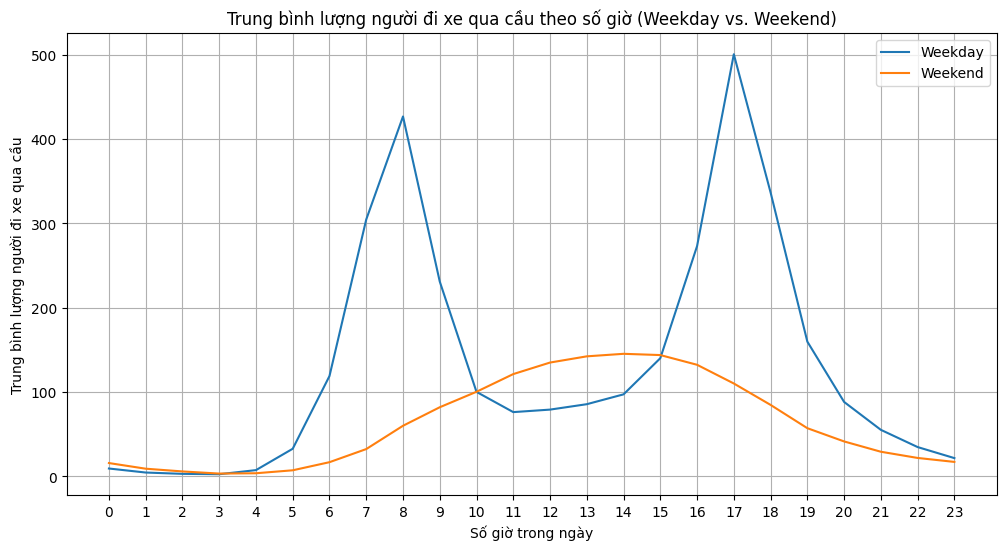

In [37]:
# Tạo cột mới để xác định ngày làm việc hoặc ngày cuối tuần
df_bicycle['Day_Type'] = np.where((df_bicycle.index.weekday < 5), 'Weekday', 'Weekend')

# Nhóm dữ liệu theo giờ và ngày làm việc/ngày cuối tuần, sau đó tính trung bình
by_day_type_time = df_bicycle.groupby(['Day_Type', df_bicycle.index.hour]).mean()

# Trực quan hóa dữ liệu bằng biểu đồ line plot
plt.figure(figsize=(12, 6))  # Kích thước biểu đồ

# Vẽ biểu đồ đường cho lượng người đi qua cầu theo số giờ, phân tách giữa ngày làm việc và ngày cuối tuần
for day_type in ['Weekday', 'Weekend']:
    plt.plot(by_day_type_time.loc[day_type].index, by_day_type_time.loc[day_type]['Total'], label=day_type)

# Đặt tên cho các trục
plt.xlabel('Số giờ trong ngày')
plt.ylabel('Trung bình lượng người đi xe qua cầu')

# Đặt tiêu đề cho biểu đồ
plt.title('Trung bình lượng người đi xe qua cầu theo số giờ (Weekday vs. Weekend)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.xticks(range(24))  # Đặt số giờ trên trục x
plt.show()


Nhận xét:
- Trung bình lượng người đi xe qua cầu theo số giờ tập trung vào khung giờ 8h và 17h vào weekday
- Lượng người đi xe qua cầu cuối tuần khá thấp
-